<div class="alert alert-info"> <b>

# Перспективная игра

Цель исследования:
Выявить определяющие успешность игры закономерности и определить потенциально популярный продукт для дальнейшего планирования  рекламных кампаний.

*План работы*:

**Шаг 1**. Откроем файл с данными и изучим общую информацию
Путь к файлу: /datasets/games.csv.

**Шаг 2**. Подготовим данные
Заменим названия столбцов (приведем к нижнему регистру);
Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
Обработаем пропуски при необходимости:
Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишем причины, которые могли привести к пропускам;
Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберем это значение и опишем, как его обработать;
Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

**Шаг 3**. Проведем исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
Соотнесем выводы с продажами игр на других платформах.
Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Шаг 4**. Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишем различия в долях продаж.
Самые популярные жанры (топ-5). Поясним разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5**. Проверим гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Пороговое значение alpha зададим самостоятельно.
Поясним:
Как мы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

###### Описание данных:
 
- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы долларов)
- **EU_sales** — продажи в Европе (миллионы долларов)
- **JP_sales** — продажи в Японии (миллионы долларов)
- **Other_sales** — продажи в других странах (миллионы долларов)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Оглавление:
* [ Шаг 1. Изучим общую информацию из имеющихся данных](#шаг-1)
* [ Шаг 2. Подготовим данные](#шаг-2)
* [ Шаг 3. Подготовим данные](#шаг-3)
* [ Шаг 4. Подготовим данные](#шаг-4)



## Шаг 1. Изучим общую информацию из имеющихся данных <a class="anchor" id="шаг-1"></a>




In [1]:
#Импортируем все необходимые библиотеки:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
 

try:
    df = pd.read_csv('C:\\Users\\jarop\Downloads\\games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')



In [2]:
# Импортируем данные
# закладываем формат df
# проеряем и выводим df

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 10

for row in df:
    print(row)
    print()
    print(df[row].value_counts())
      
print('\nЧисло дубликатов:', df.duplicated().sum())
df.sample(10)

df.describe(include = "all")    


Name

Need for Speed: Most Wanted             12
LEGO Marvel Super Heroes                 9
Ratatouille                              9
Madden NFL 07                            9
FIFA 14                                  9
                                        ..
This War of Mine                         1
Wild West Shootout                       1
Chuugen no Hasha: Sangoku Shouseiden     1
Critical Depth                           1
Little Red Riding Hood's Zombie BBQ      1
Name: Name, Length: 11559, dtype: int64
Platform

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64
Year_of_Release

2,008.00    1427
2,009

,Name,Platform,Year_of_Release,Genre,NA_sales,...,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,"16,446.00",16713,"16,715.00",...,"16,715.00","16,715.00","8,137.00",10014,9949
unique,11559,31,NaN,12,NaN,...,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,...,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,...,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,"2,006.48",NaN,0.26,...,0.08,0.05,68.97,NaN,NaN
std,NaN,NaN,5.88,NaN,0.81,...,0.31,0.19,13.94,NaN,NaN
min,NaN,NaN,"1,980.00",NaN,0.00,...,0.00,0.00,13.00,NaN,NaN
25%,NaN,NaN,"2,003.00",NaN,0.00,...,0.00,0.00,60.00,NaN,NaN
50%,NaN,NaN,"2,007.00",NaN,0.08,...,0.00,0.01,71.00,NaN,NaN
75%,NaN,NaN,"2,010.00",NaN,0.24,...,0.04,0.03,79.00,NaN,NaN


ВЫВОД:

* Необходимо привести к правильному типу столбец : Year of Release.
* Также нужно привести к нижнему регистру столбцы нашей таблицы, а так же сами названия колонок.
* Имеются пустые значения в столбцах rating, user_score, critic_score. 
* Мы можем заменить имеющиеся пустые значения в таблице: year of release на года от той же игры только другой платформы, в остальных случаях решим в процессе предобработки.
* Дубликатов нет.
* В распределении имеет место положительный перекос (возможно есть несколько высоких значений).   

## Шаг 2. Подготовим данные<a class="anchor" id="шаг-2"></a>


In [3]:
# Заменим названия столбцов (приведем к нижнему регистру) 
df.columns = df.columns.str.lower()
df.columns


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [4]:
# Приведем к нижнему регистру следующие столбцы:
for column in df[['name','platform','genre','rating']]:
    df[column] = df[column].str.lower()
# Изменим тип данных в столбце year_of_release 
df['year_of_release'] = df['year_of_release'].astype('Int64')


In [5]:
#Проверим подробнее, где есть пропуски
all_cols = df.columns
all_cols
for col in all_cols:
    print(col)
    print()
    print(df[col].isna().value_counts())
    print()

name

False    16713
True         2
Name: name, dtype: int64

platform

False    16715
Name: platform, dtype: int64

year_of_release

False    16446
True       269
Name: year_of_release, dtype: int64

genre

False    16713
True         2
Name: genre, dtype: int64

na_sales

False    16715
Name: na_sales, dtype: int64

eu_sales

False    16715
Name: eu_sales, dtype: int64

jp_sales

False    16715
Name: jp_sales, dtype: int64

other_sales

False    16715
Name: other_sales, dtype: int64

critic_score

True     8578
False    8137
Name: critic_score, dtype: int64

user_score

False    10014
True      6701
Name: user_score, dtype: int64

rating

False    9949
True     6766
Name: rating, dtype: int64



In [6]:
#на рабочих проектах стоит искать дубликаты по ключевым столбцам, для примера по сумме параметров:
df.duplicated(subset = ['name', 'platform', 'year_of_release'] ,keep= False)

0        False
1        False
2        False
3        False
4        False
         ...  
16710    False
16711    False
16712    False
16713    False
16714    False
Length: 16715, dtype: bool

In [7]:
# Посчитаем количество пустых значений в столбце year_of_release
df['year_of_release'].isna().sum()

269

In [8]:
#Напишем цикл где будем делать замену на года тех у кого совпадает название с игрой но в графе year_of_release пусто
for i in df[df['year_of_release'].isnull() == True].index:  
    df['year_of_release'][i] = df.loc[df['name'] == df['name'][i], 'year_of_release'].max()
#Посмотрим сколько удалось заполнить пустых значений
df['year_of_release'].isna().sum()    

146

In [9]:
#Заменим tbd в user_score в ( to be determined, to be done. То есть, данные были нарочно не заполнены, так как не определились с рейтингом) на Nan
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')
# Поменяем формат столбца user_score на float
df['user_score'] = df['user_score'].astype(float)
df['user_score'].dtype
#Посмотрим как выглядит теперь наша таблица
df.sample(20)

,name,platform,year_of_release,genre,na_sales,...,jp_sales,other_sales,critic_score,user_score,rating
9777,lovely lisa,ds,2007,simulation,0.11,...,0.00,0.01,NaN,NaN,e
12518,secret files: tunguska,wii,2008,adventure,0.04,...,0.00,0.00,65.00,7.60,t
14712,syberia ii,xb,2004,adventure,0.02,...,0.00,0.00,71.00,8.70,t
7729,kouchuu ouja mushi king: greatest champion e n...,ds,2005,action,0.00,...,0.19,0.00,NaN,NaN,NaN
8566,lego star wars: the force awakens,ps3,2016,action,0.04,...,0.00,0.03,NaN,NaN,e10+
3381,fifa 15,psv,2014,sports,0.08,...,0.05,0.12,NaN,3.10,e
9289,nhl breakaway 98,ps,1996,sports,0.08,...,0.00,0.01,NaN,NaN,NaN
6836,sakura wars: atsuki chishio ni,ps2,2003,role-playing,0.00,...,0.24,0.00,NaN,NaN,NaN
1847,wwe 2k14,x360,2013,sports,0.64,...,0.00,0.10,75.00,7.70,t
7112,need for speed: undercover,ds,2008,racing,0.18,...,0.00,0.02,59.00,6.70,e10+


In [10]:
# Пропущенные значения в столбце 'rating' заменим на "не определен" так как это категориальная переменная
df['rating']. fillna('NOT KNOWN', inplace=True)


In [11]:
#Удалим пропуски в столбцах name, genre, year_of_release (за их малым количеством):
 
df.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           16567 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [12]:
#Создадим новый столбец total_sales(суммарные продажи во всех регионах) 
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,...,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,...,8.45,76.00,8.00,e,82.54
1,super mario bros.,nes,1985,platform,29.08,...,0.77,NaN,NaN,NOT KNOWN,40.24
2,mario kart wii,wii,2008,racing,15.68,...,3.29,82.00,8.30,e,35.52
3,wii sports resort,wii,2009,sports,15.61,...,2.95,80.00,8.00,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,...,1.00,NaN,NaN,NOT KNOWN,31.38
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,...,0.00,NaN,NaN,NOT KNOWN,0.01
16711,lma manager 2007,x360,2006,sports,0.00,...,0.00,NaN,NaN,NOT KNOWN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,...,0.00,NaN,NaN,NOT KNOWN,0.01
16713,spirits & spells,gba,2003,platform,0.01,...,0.00,NaN,NaN,NOT KNOWN,0.01


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           16567 non-null  object 
 11  total_sales      16567 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


**Итог:**

Пропуски ослались в 2-х столбцах critic_score, user_score . Заполнение пропусков в этих категориальных переменных исказит результаты в корреляционном анализе и стат-тестах,поэтому оставим их в том же виде.

## Шаг 3. Проведем исследовательский анализ данных<a class="anchor" id="шаг-3"></a>

 Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

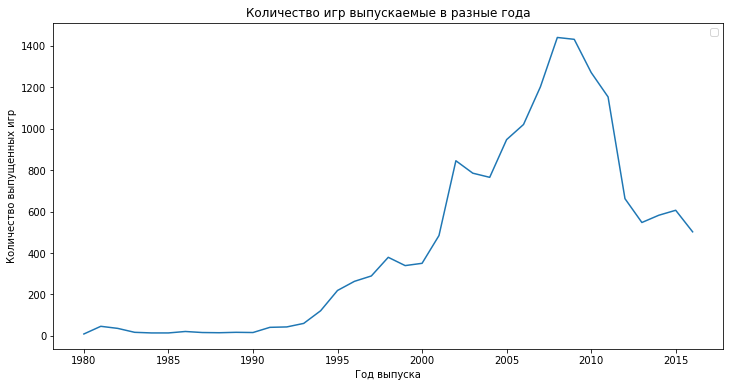

In [14]:
# Методом пивот отсортируем таблицы и отрисуем график, чтобы просмотреть как менялось количество выпускаемых игр
platform_on_sales = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=platform_on_sales)
plt.title("Количество игр выпускаемые в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('');

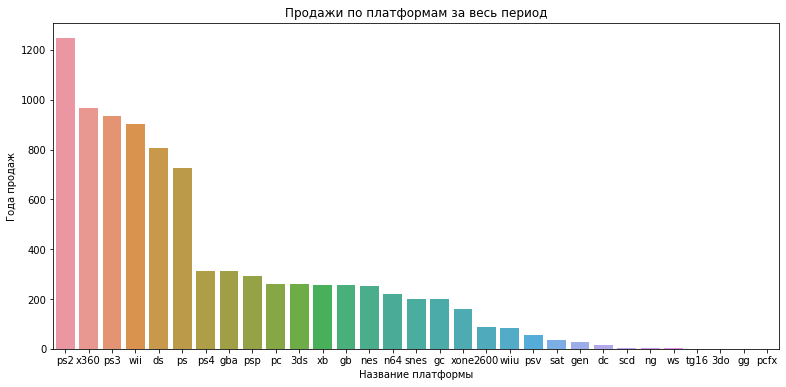

In [15]:
#Посмотрим, как менялись продажи по платформам
platform_on_sales = df.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Года продаж");

Самые популярные игровые платформы за весь период - PS2, X360, PS3, WII, DS, PS.

 Нас интнресует актуальный период, который  будет способствоавть построению прогноза на 2017 год. Установим минимальный порог продаж, где для каждой платформы ищется число лет, когда суммарные продажи превышали этот порог. Далее высчитаем среднее число таких лет- это будет среднее время жизни платформы. И актуальный период составит половину этого времени так как вторую половину жизни платформы падают.

In [16]:
# Рассчитаем актуалый период, за который будем брать данные
# Зададим минимальные значения продажи в миллионах
min_sales = 10
# Найдем суммарные продажи в год выше порога
report = df.groupby(['platform','year_of_release']).agg({'total_sales':'sum'}).query ('total_sales > @min_sales')
# Определим среднее число лет выше порога продажи, деленное на 2( потому что половину жизни платформа падает)
report.reset_index().groupby('platform').agg({'year_of_release':'nunique'}).mean() / 2

year_of_release   3.04
dtype: float64

Актуальный период будет равен 3 годам, поэтому будем рассматривать данные с 2013-2016 год

In [17]:
# Напишем функцию, которая будет возвращать нужную сводную таблицу и выводить данные с 2013 года
def year_total_sale_for_platform(name, data):
    slicee = data[(data['platform'] == name) & (data['year_of_release'] > 2013)]
    total = slicee.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

In [18]:
# Создадим свою таблицу по лидирующим по продажам платформам за актуальный период включая 2016 год
actual_data = df.query('year_of_release > 2013') 
actual_2016 = actual_data.query('year_of_release == 2016') #выберем позиции с актуальными действующими на 2016 год играми 
actual_2016_names = actual_2016['name'].unique() #создадим словарь актуальных игр с 2016 годом
actual_data = actual_data.query('name in @actual_2016_names')  #уберем из actual_data игры без продаж за 2016 
top_5_platforms = actual_data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False).head(5)
top_5_platforms



,platform,total_sales
3,ps4,76.22
8,xone,31.02
0,3ds,15.14
2,ps3,8.92
4,psv,6.38


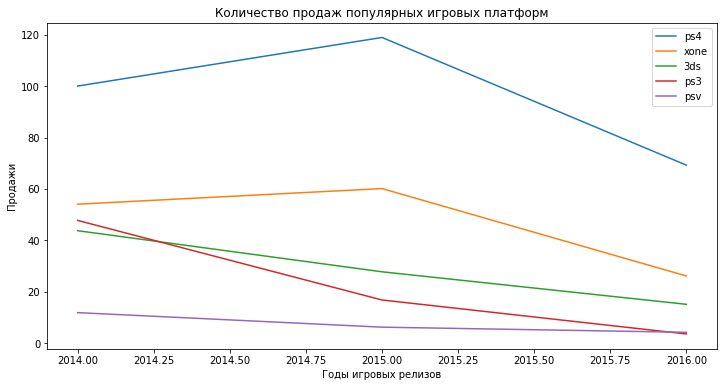

In [19]:
#Отрисуем все игровые платформы и их поведение за последние 3 года
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_5_platforms['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,df)['total_sales'], label=i)
    plt.legend()

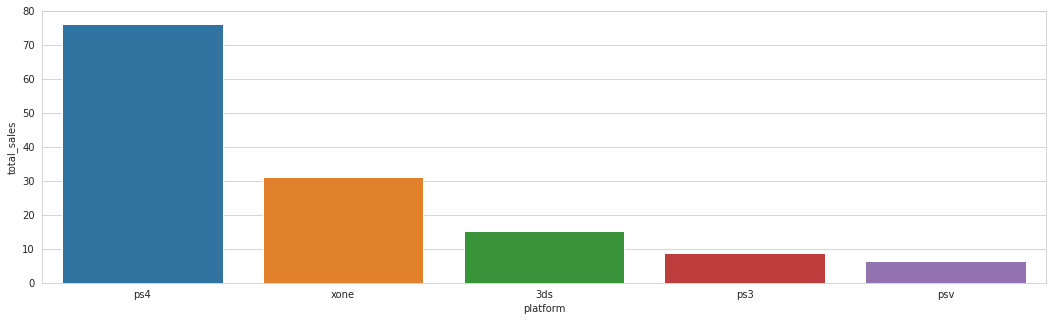

In [20]:
# Визуализируем рейтинг топовых платформ актуального периода
sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.barplot(data = top_5_platforms, x='platform', y='total_sales');

Наиболее прибыльные платформы - PS4, XOne, 3ds, PS3, psv  

**Итог:**

- Из графиков видим, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года, где далеее уже видим спад консольных игр (это можно связать с тем, что в это время начинают создаваться мобильные приложения и мобильные игры).
- Самые популярные игровые платформы за весь период - PS2, X360, PS3, WII, DS, PS.

- В топ наиболее прибыльных платформ за актуальный период вошли PS4, XOne, 3ds, PS3, psv.
- По объемам продаж в актуальном периоде двукратно лидирует sp4, что так же видим визуально.

 Построим график «ящик с усами» по глобальным продажам игр за актуальный период в разбивке по платформам

In [21]:
#Сохраним в переменной df_top_5_platforms топ 5 платформ и избавимся от выбросов
list_of_top5 = ['ps4','xone','3ds','ps3','psv']
df_top_5_platforms = actual_data[actual_data['platform'].isin(['ps4','xone','3ds','ps3','psv'])]
df_top_5_platforms = df_top_5_platforms[df_top_5_platforms['total_sales']<1.4]
df_top_5_platforms['total_sales'].describe()


count   409.00
mean      0.15
std       0.24
min       0.01
25%       0.02
50%       0.05
75%       0.15
max       1.38
Name: total_sales, dtype: float64

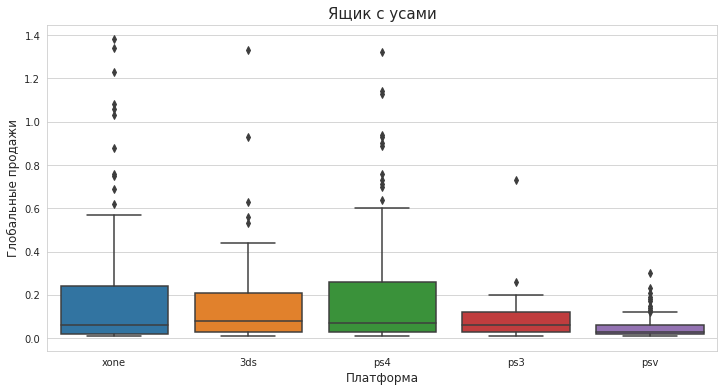

In [22]:
#Построим ящики с усами 
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_5_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

Итог :
- Исходя из графиков, диаграмм размаха, видно, что медиана немного различается.
- Больше всех продаж у PS4, затем у XOne и X360, далее у 3ds и PS3. 

*Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами*

In [23]:
#Корреляция между оценками пользователей и продажами 
sony_play_station4 = actual_data[actual_data['platform']=='ps4']
sony_play_station4['user_score'].corr(sony_play_station4['total_sales'])

-0.12790123478227197

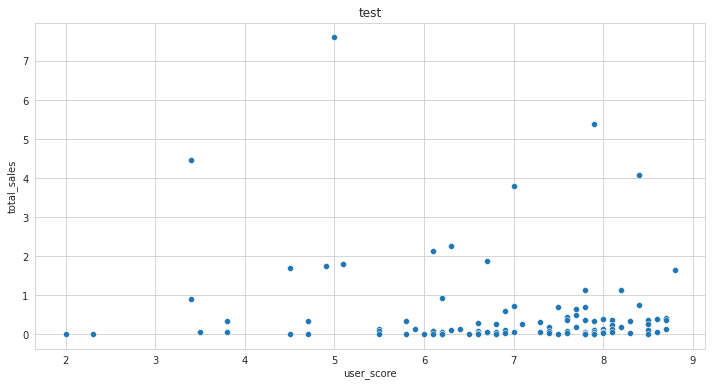

In [24]:
#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=sony_play_station4)
plt.title('test');

In [25]:
#Корреляция между оценкой критиков и продажам
sony_play_station4['critic_score'].corr(sony_play_station4['total_sales'])

0.3720012853897933

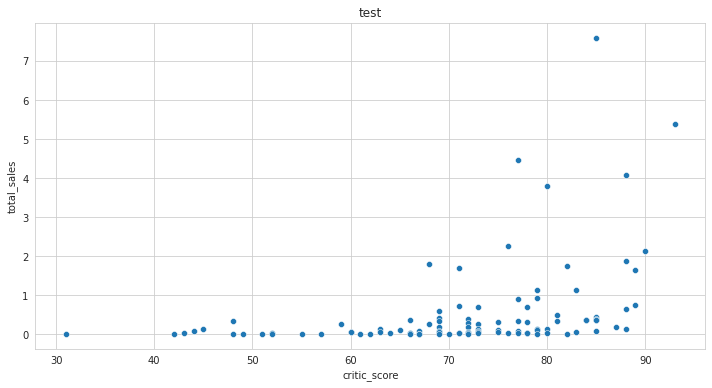

In [26]:
#Построим диаграмму рассеяния по оценкам критиков 
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sony_play_station4)
plt.title('test');

Соотнесем выводы с продажами игр на других платформах.

In [27]:
#Напишем функцию, которая будет отрисовывать графики рассеивания и считать корреляции
def other_platform_matrix(name_of_platform):
    platform = actual_data[actual_data['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
    
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Сильная', critic_correl)
    
    if 0.3 >= correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', correl)
    if 0.5 >= correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', correl)
    if 0.7 >= correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', correl)
    if 0.9 >= correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', correl)
    if 1 >= correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная', correl)
    print('\n')

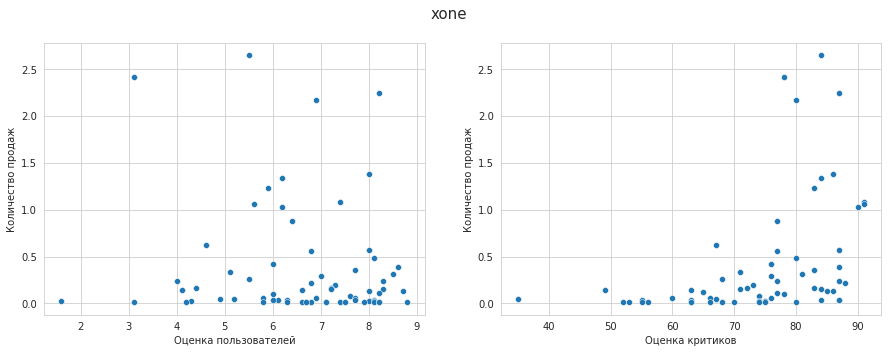

Корреляция между отзывами критиков и игровой платформой  XONE : Умеренная 0.414677521813978




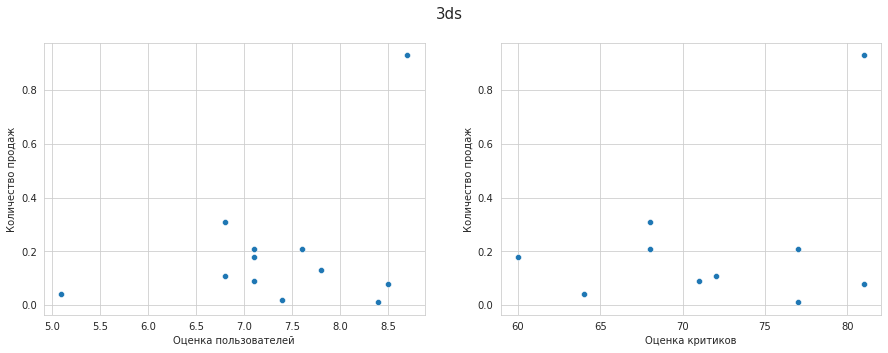

Корреляция между отзывами критиков и игровой платформой  3DS : Умеренная 0.33840848355747477
Корреляция между отзывами пользователей и продажами  3DS : Умеренная 0.3733649712783034




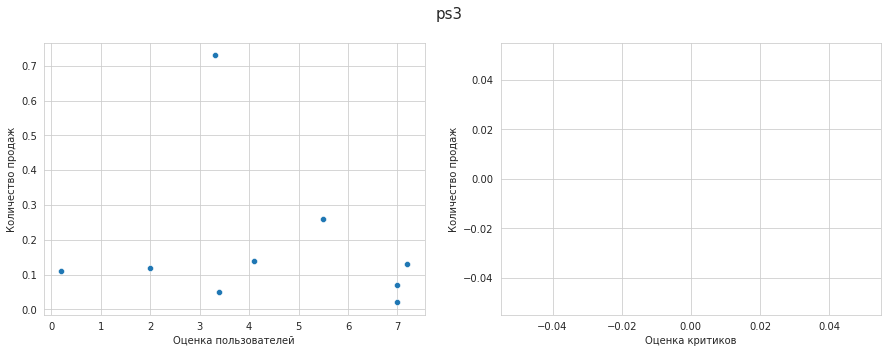

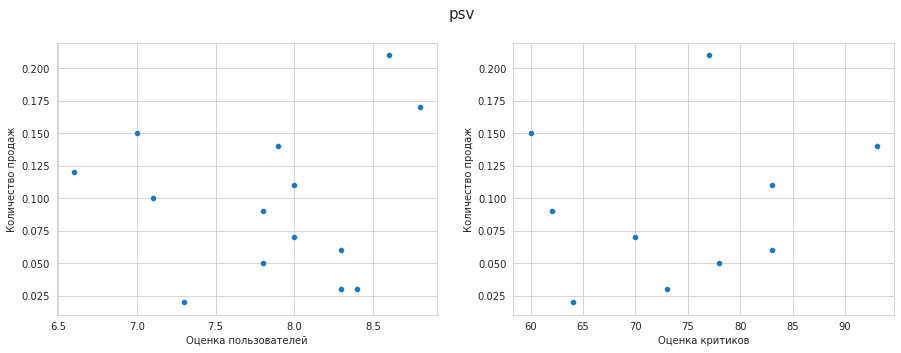

Корреляция между отзывами критиков и игровой платформой  PSV : Слабая 0.18480719274930904




In [28]:
list_of_top4 = ['xone','3ds','ps3','psv']
#С помощью цикла выведем все 5 графиков
for platform in list_of_top4:
    other_platform_matrix(platform)

**Итог:**
* Видимая отрицательнная корреляция по "ps4" между оценками пользователей и продажами, за актуальный период (-0.13) означает, что связь, существующая между двумя переменными, прямо противоположна.
* Корреляцию по "ps4" между оценками критиков (0,37) не рассматриваем для построения зависимости величин, т.к. показатель коэф. корреляции от -0,5 до +0,5.
* Практически у всех  оставшихся актуальных платформ присутствуем корреляция, но она показывают слабую линейную зависимость.

*Посмотрим на общее распределение игр по жанрам. Посмотрим на самые прибыльные жанры. Выделяются ли жанры с высокими и низкими продажами?*

In [29]:
distr_genre = df.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
distr_genre

,genre,total_sales
0,action,"1,735.63"
1,sports,"1,326.71"
2,shooter,"1,050.02"
3,role-playing,931.77
4,platform,826.03
5,misc,794.41
6,racing,725.82
7,fighting,443.59
8,simulation,388.46
9,puzzle,240.54


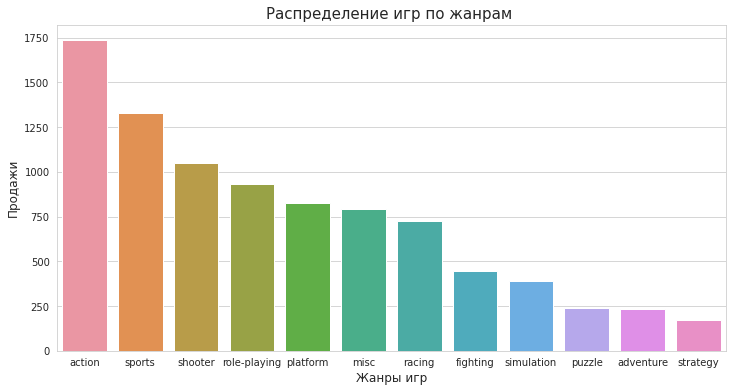

In [30]:
#Используем барплот чтобы наглядно посмотреть рейтинг жанров
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12);

In [31]:
#Сохраним в переменной list_of_top4 топ 4 жанров
list_of_top4 = ['action','sports','shooter','role-playing']
df_top_4_genre = df[df['genre'].isin(['action','sports','shooter','role-playing'])]
df_top_4_genre['total_sales'].describe()

count   8,470.00
mean        0.60
std         1.66
min         0.00
25%         0.08
50%         0.20
75%         0.55
max        82.54
Name: total_sales, dtype: float64

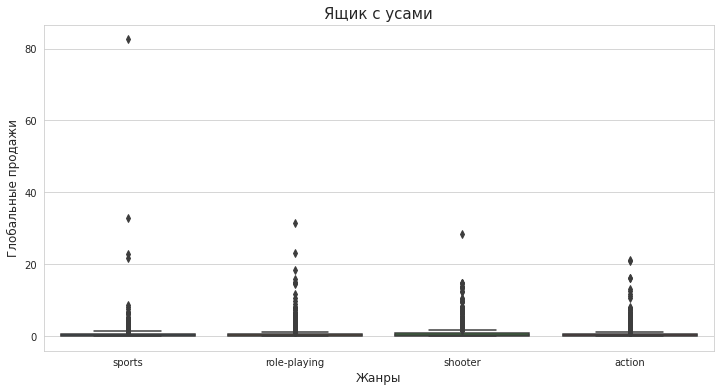

In [32]:
#Построим ящики с усами 
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_4_genre, x='genre', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Жанры', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

In [33]:
#Сохраним в переменной list_of_top4 топ 4 жанров без выбросов
list_of_top4 = ['action','sports','shooter','role-playing']
df_top_4_genre = df[df['genre'].isin(['action','sports','shooter','role-playing'])]
df_top_4_genre = df_top_4_genre[df_top_4_genre['total_sales']<1.4]
df_top_4_genre['total_sales'].describe()

count   7,671.00
mean        0.29
std         0.31
min         0.00
25%         0.07
50%         0.17
75%         0.41
max         1.39
Name: total_sales, dtype: float64

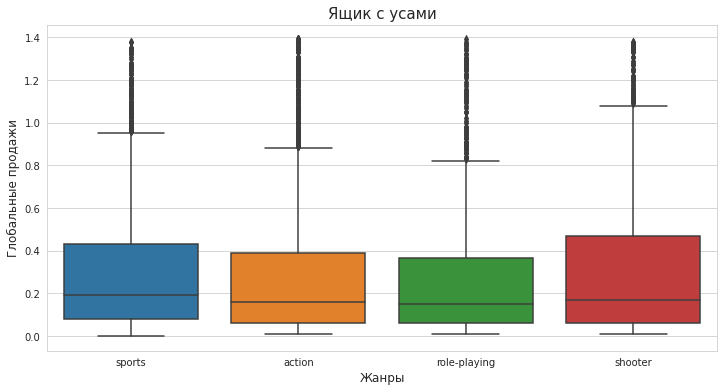

In [34]:
#Построим ящики с усами 
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_4_genre, x='genre', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Жанры', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

Итог:
Удалив выбросы мы видим на первом месте "Стреллялки",затем категория "Спорт", далее идут "Экшн" и "Ролевые игры".

**ВЫВОД:**

- Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.

- Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.

- Средняя жизнь игровой платформы составляет 10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.

- Вактуальном периоде лидируют PS4, XOne, 3ds, PS3, psv.

- Больше всего, за актуальный период продаются игры на Sony Playstation 3 и XONE.

- Не всех платформ наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Заметнее всего корреляция между оценками пользователей и продажими в Sony Playstation 3 - Видимая отрицательнная корреляция (-0.13), прямо противоположна, что возможно и является условием ее отрыва в лидерстве.
- Самые популярные жанры по убыванию - "Shooter", "Sports", "Action", "Role-playiling" .Последнеее место у "Strategy".



## Шаг 4. Составим портрет пользователя каждого региона<a class="anchor" id="шаг-4"></a>

- Определим для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясним разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Портрет пользователя North America**

In [35]:
#Напишем функции для создания сводных таблиц и отсривоки барплотов

#Функция для создания сводбных таблиц за весь период
def forpivot(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        ppivot = df.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n') 
        sns.set_palette("Blues")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

plt.show()
sns.set()

#Функция для создания сводных таблиц за последний год
def for_pivot_2016(row, title):
    temp = df[df['year_of_release']>2015]
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n')
        sns.set_palette("BuGn_r")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)

  platform  na_sales
0     x360    599.15
1      ps2    580.09
2      wii    494.01
3      ps3    391.60
4       ds    381.38



      genre  na_sales
0    action    873.70
1    sports    681.69
2   shooter    590.35
3  platform    444.44
4      misc    401.69



      rating  na_sales
0          e  1,288.00
1  NOT KNOWN  1,229.15
2          t    751.26
3          m    746.95
4       e10+    352.56





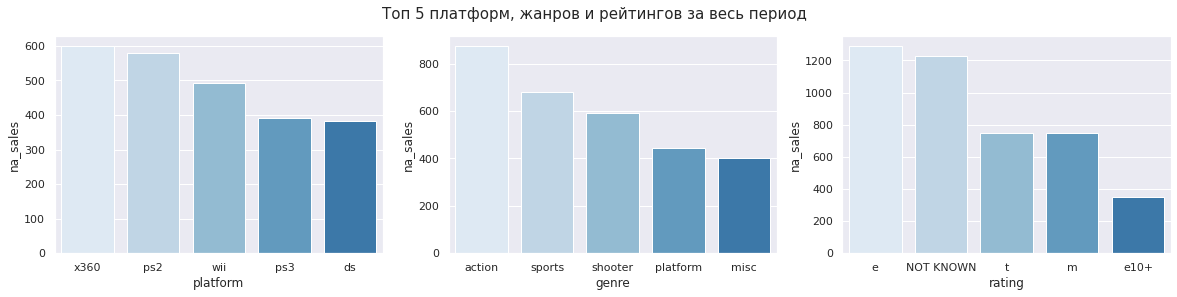

In [36]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период
forpivot('na_sales','Топ 5 платформ, жанров и рейтингов за весь период')

  platform  na_sales
0      ps4     21.49
1     xone     14.27
2      3ds      4.14
3     wiiu      2.10
4       pc      1.36



          genre  na_sales
0       shooter     16.24
1        action      9.29
2        sports      7.54
3  role-playing      5.89
4      fighting      1.84



      rating  na_sales
0          m     15.67
1          t      8.95
2  NOT KNOWN      8.53
3          e      7.97
4       e10+      3.81





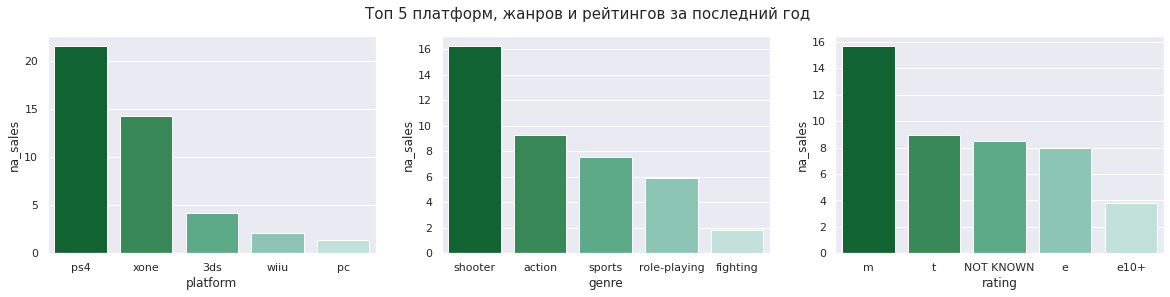

In [37]:
#Выведем топ 5 платформ, жанров и рейтингов за последний год
for_pivot_2016('na_sales','Топ 5 платформ, жанров и рейтингов за последний год')

ВЫВОД:

- Самые популярные игровые платформы в северной америке за все время это: XBOX, PS2, WII, PS3, DS,
- Топ 5 жанров в северной америке за все время: action, sports, shooter, platform, misc,
- По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

Если посмотреть с 2015 по 2016 года, то мы видим как интерес кардинально меняется:

- Топ игровых приставок выглядит таким образом : PS4, Xone, DS3,
- Топ жанров игр: Shooter, Action, Sports,
- Топ рейтингов игр : "От 17 и выше" , "от 13 и выше" и "для всех".

**Портрет пользователя European Union**

  platform  eu_sales
0      ps2    337.05
1      ps3    328.97
2     x360    269.79
3      wii    261.48
4       ps    212.39



     genre  eu_sales
0   action    517.58
1   sports    375.60
2  shooter    316.96
3   racing    235.47
4     misc    211.32



      rating  eu_sales
0          e    709.20
1  NOT KNOWN    610.40
2          m    483.17
3          t    423.56
4       e10+    188.34





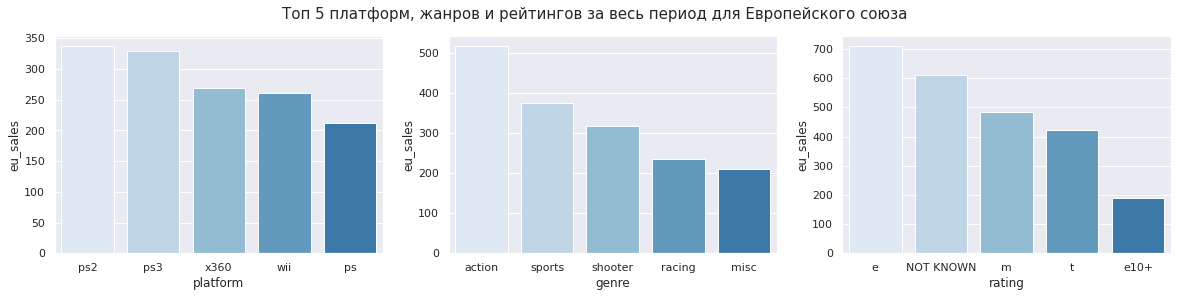

In [38]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период для Европейского союза
forpivot('eu_sales','Топ 5 платформ, жанров и рейтингов за весь период для Европейского союза')

  platform  eu_sales
0      ps4     31.78
1     xone      9.63
2       pc      3.53
3      3ds      2.33
4     wiiu      1.48



          genre  eu_sales
0       shooter     15.90
1        sports     12.01
2        action     10.68
3  role-playing      4.28
4        racing      1.77



      rating  eu_sales
0          m     16.54
1          e     13.61
2          t      9.79
3  NOT KNOWN      7.47
4       e10+      3.81





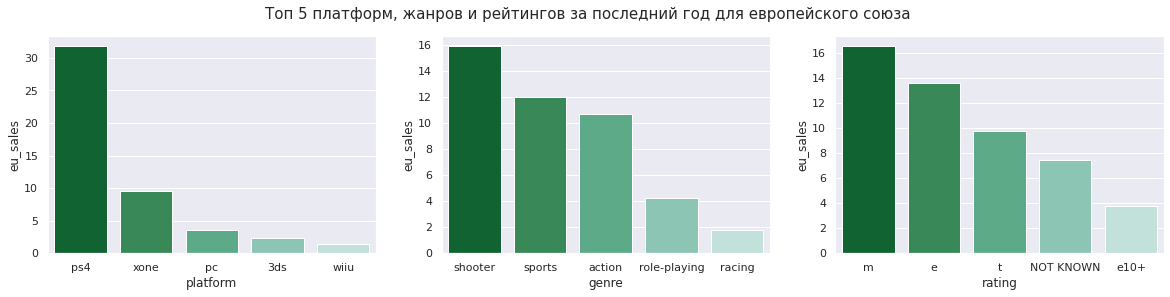

In [39]:
#Выведем топ 5 платформ, жанров и рейтингов за последний год для европейского союза
for_pivot_2016('eu_sales','Топ 5 платформ, жанров и рейтингов за последний год для европейского союза')


ИТОГ:

- Самые популярные игровые платформы в Европе это: PS2, PS3, X360, WII, PS,
- Топ 5 жанров в Европе : action, sports, shooter, racing, misc,
- По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех".

За последний год интерес у пользователя кардинально изменился:

- Топ жанров стал: shooter, sports, action,
- Топ платформ: PS4, Xone, PC,
- Топ рейтингов: "От 17 и выше" , "Для всех" и "от 13 и выше".

**Портрет пользователя Japanese**

  platform  jp_sales
0       ds    175.02
1       ps    139.78
2      ps2    137.74
3     snes    116.55
4      3ds    100.64



          genre  jp_sales
0  role-playing    353.88
1        action    160.15
2        sports    135.27
3      platform    130.71
4          misc    108.04



      rating  jp_sales
0  NOT KNOWN    838.39
1          e    198.02
2          t    150.88
3          m     63.61
4       e10+     40.20





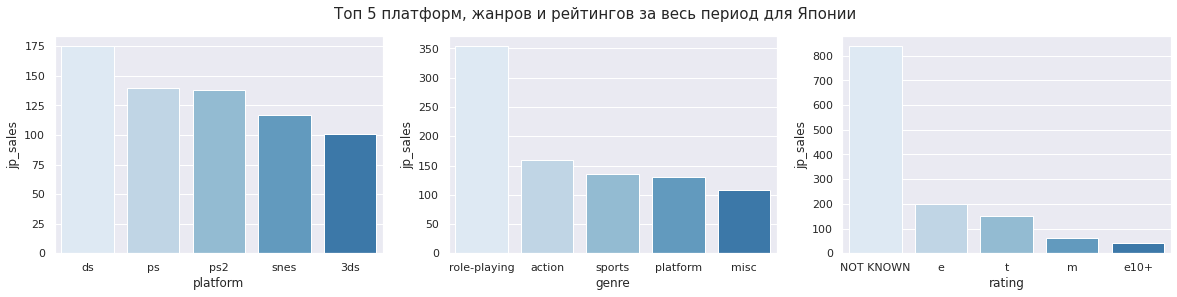

In [40]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период для Японии
forpivot('jp_sales','Топ 5 платформ, жанров и рейтингов за весь период для Японии')

  platform  jp_sales
0      3ds      8.03
1      ps4      5.74
2      psv      3.56
3      ps3      1.30
4     wiiu      0.67



          genre  jp_sales
0        action      7.07
1  role-playing      6.61
2     adventure      1.18
3       shooter      1.06
4          misc      1.04



      rating  jp_sales
0  NOT KNOWN     14.32
1          t      2.27
2          m      1.20
3          e      1.07
4       e10+      0.45





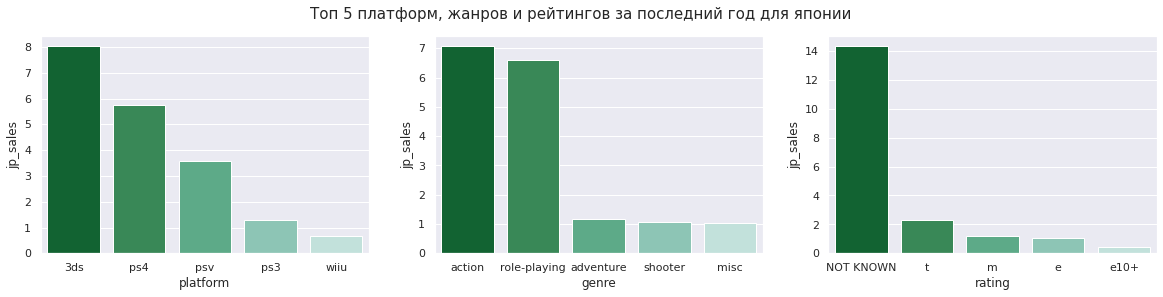

In [41]:
#Выведем топ 5 платформ, жанров и рейтингов за последний год для японии
for_pivot_2016('jp_sales','Топ 5 платформ, жанров и рейтингов за последний год для японии')

Итог:

- Самые популярные игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS,
- Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc,
- По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"/

За последний год интерес у пользователя кардинально изменился:

- Топ Жанров: action, role-playing,
- Топ платформ: 3ds, ps4, psv,
- Топ рейтингов: страна не аппелирующая к рейтингу, из видимых  "от 13 и выше", "от 17 и выше" и "для всех.

**Вывод по составлению портрета пользователя каждого региона** 

* Самые популярные игровые платформы в северной америке это: XBOX, PS2, WII, PS3, DS Топ 5 жанров в северной америке : action, sports, shooter, platform, misc По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

* Самые популярные игровые платформы в Европе это: PS2, PS3, XBOX, WII, PS Топ 5 жанров в Европе : action, sports, shooter, racing, misc По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше"

* Самые популярные игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

Если брать данные за последний год:

**Северная Америка:**
топ игровых платформ выглядит так: PS4, Xone, DS3
Топ Жанров игр: Shooter, Action, Sports
Топ Рейтингов игр: "От 17 и выше" , "от 13 и выше" и "для всех"


**Европейский союз:**
Топ игровых платформ : PS4, Xone, PC
Топ жанров: Shooter, Sports, Action
Топ рейтингов: "От 17 и выше", "для всех", "от 13 и выше"


**Япония:**
Топ игровых платформ : 3DS, PS4, PSV
Топ жанров: Action, Role-playing, Adventure
Топ рейтингов: "От 13 и выше", "от 17 и выше", "для всех"

**Итог анализа**: для прогноза будущих продаж лучше брать данные за последний год, так как технологии меняются с оч быстрыми темпами, и вкусы людей также могут меняться оч быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом от 17 и выше

## Шаг 5. Проверим гипотезы

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

*Используем метод stats.ttest_ind. В качестве первого аргумента мы предоставляем выборку данных и в качестве второго - выборку для сопоставления,выбрав False, который не предполагает равной дисперсии (что видно в 3 шаге проекта).*

Сформулируем H₀ и H₁:

**Нулевая гипотеза H₀**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Альтернативная гипотеза H₁**: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [42]:
# Сохраним в переменных xbox_hyp и pc_hyp соответствующие данные (актуальные данные за последние 10 лет)
xone_hyp = df[(df['platform']=='xone') & (df['year_of_release']>2013)]['user_score']
pc_hyp = df[(df['platform']=='pc') & (df['year_of_release']>2013)]['user_score']

#Посчитаем средний рейтинг пользователя для xbox платформ
xone_hyp.mean()

6.594545454545454

In [43]:
#Посчитаем средний рейтинг пользователя для PC платформ
pc_hyp.mean()

6.316260162601626

In [44]:
#Проверим гипотезы, используя метод stats.ttest_ind. 

alpha = .01

results = st.ttest_ind(xone_hyp.dropna(), pc_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.139237120435483
Не получилось отвергнуть нулевую гипотезу


Полученное p-значение для взвешивания силы доказательств, чтобы увидеть, является ли оно статистически значимым имеет значение 0.139. Наблюдаемое р-значение выше, чем альфа, говорит о том, что результат является статистически не значимым,чтобы отвергнуть ннулевую гипотезу.


**Вывод: Нулевая гипотеза подтверждена - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.** Полученное значение p-value говорит о том, что хотя средняя оценка пользователей на разных платформах и неодинакова, с вероятностью в почти 13,9% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между оценками.

In [45]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

*Так же используем метод stats.ttest_ind. В качестве первого аргумента мы предоставляем выборку данных и в качестве второго - выборку для сопоставления,выбрав False.*

**Сформулируем H₀ и H₁:**

**Нулевая гипотеза H₀:** Средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Альтернативная гипотеза H₁:** Средние пользовательские рейтинги жанров Action и Sports различаются.

In [46]:
# Сохраним в переменных genre_action_hyp и genre_sports_hyp соответствующие данные с пользовательскими оценками
genre_action_hyp = df[(df['genre']=='action') & (df['year_of_release']>2013)]['user_score']
genre_sports_hyp = df[(df['genre']=='sports') & (df['year_of_release']>2013)]['user_score']

#выведем среднюю оценку по жанру экшн
genre_action_hyp.mean()

6.766442953020134

In [47]:
#выведем среднюю оценку по жанру спорт
genre_sports_hyp.mean()

5.225196850393701

In [48]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(genre_action_hyp.dropna(), genre_sports_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.658176026869598e-15
Отвергаем нулевую гипотезу


**Вывод: Нулевая гипотеза не подтверждена. Таким образом средние рейнтинги по двум жанрам различаюются.**

**ВЫВОД по проверке гипотез:**

- Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые" - гипотеза подверждена.
- Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные"- гипотеза не подтвердилась.

**ОБЩИЙ ВЫВОД**

Проведя анализ,определяющий успешность игр и ее закономерности для определения потенциально популярного продукта для дальнейшего планирования рекламных кампаний мы выявили:

* Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2008 года. С 2008 года после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок консольных игр.

* За весь период консольных приставок самые популярные оказались: PS4, X360, PS3, WII, DS, PS
Выявили что рост игры а затем ее спад в принципе является закономерностью (средняя продолжительность жизни игровой приставки составляет порядка 10 летБ где половивину из нних наблюдается рост игровой консоли,затем ее спад).

* Проведя анализ оценок пользователей и критиков мы выявили, что оценки пользователей более взаимосвязаны с продажами самих игр. Так же определили, что самый популярный жанр за все время это стреллялки. На последнем месте стратегии.

* Далее,составив портреты пользователей каждого региона выяснили, что в Северной америке самые популярные жанры это action, sports, shooter. Игровые приставки : XBOX, PS2 и WII. А по рейтингу игр люди предпочитают игры с рейтингами: "для всех", "от 13 и выше" , за последний год сместился  в категорию "от 17 и выше".
* В Европе же, популярные жанры точно такие же как и в Северной Америке. Но приставки по предпочитают по следующей очередности: PS2, PS3, XBOX. Рейтинг игр с13 так же перешел в категорию от 17 и выше.
* В Японии люди предпочитают игровые приставки: DS, PS, PS2. А жанры игры : Role-playing, action и sports. Рейтинг игр здесь представлен лидерством "не определен" , за тем идет  от "13 и выше" и  от "17 и выше" и "для всех".

Рейтинг ESRB, котрый в основном используется в США, Канаде и Мексике изначально определяюще влиял на портрет пользователя Северной Америки, с развитием игровой индустрии он определляющую роль стал играть в Европе, в сравнении с Японией его позиции нимного ниже.

**Исходя из поставленной цели проекта можно презентовать следующее:** 

* **лучше всего продавать игры для таких приставок как Sony Playstation 4.**(Возможно посылы наших исследований отчасти вдохновили Японию анонсировать выход уже Sony Playstation 5).

* **Выбор жанра - Shooter.** 

* **Выбирать игры с рейтингом "от 17 и выше".**
